In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use("default")


In [2]:
np.random.seed(42)

dates = pd.date_range(start="2023-01-01", end="2024-12-31")

data = {
    "Date": dates,
    "Temperature": np.random.normal(30, 5, len(dates)),
    "Rainfall": np.random.exponential(5, len(dates)),
    "Humidity": np.random.randint(40, 95, len(dates))
}

df = pd.DataFrame(data)

df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

os.makedirs("../../data/weather", exist_ok=True)
df.to_csv("../../data/weather/weather_data.csv", index=False)

df.head()


,Date,Temperature,Rainfall,Humidity,Month,Year
0,2023-01-01,32.483571,1.601407,63,1,2023
1,2023-01-02,29.308678,4.039178,81,1,2023
2,2023-01-03,33.238443,5.269443,69,1,2023
3,2023-01-04,37.615149,8.852196,53,1,2023
4,2023-01-05,28.829233,1.156013,45,1,2023


In [3]:
df = pd.read_csv("../../data/weather/weather_data.csv", parse_dates=["Date"])

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         731 non-null    datetime64[ns]
 1   Temperature  731 non-null    float64       
 2   Rainfall     731 non-null    float64       
 3   Humidity     731 non-null    int64         
 4   Month        731 non-null    int64         
 5   Year         731 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 34.4 KB


,Date,Temperature,Rainfall,Humidity,Month,Year
count,731,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2024-01-01 00:00:00,29.931266,5.193390,66.854993,6.519836,2023.500684
min,2023-01-01 00:00:00,13.793663,0.024761,40.000000,1.000000,2023.000000
25%,2023-07-02 12:00:00,26.518412,1.401323,54.000000,4.000000,2023.000000
50%,2024-01-01 00:00:00,29.960137,3.723922,66.000000,7.000000,2024.000000
75%,2024-07-01 12:00:00,33.135032,7.077650,80.000000,10.000000,2024.000000
max,2024-12-31 00:00:00,49.263657,37.208615,94.000000,12.000000,2024.000000
std,NaN,4.916842,5.205246,15.636830,3.451913,0.500342


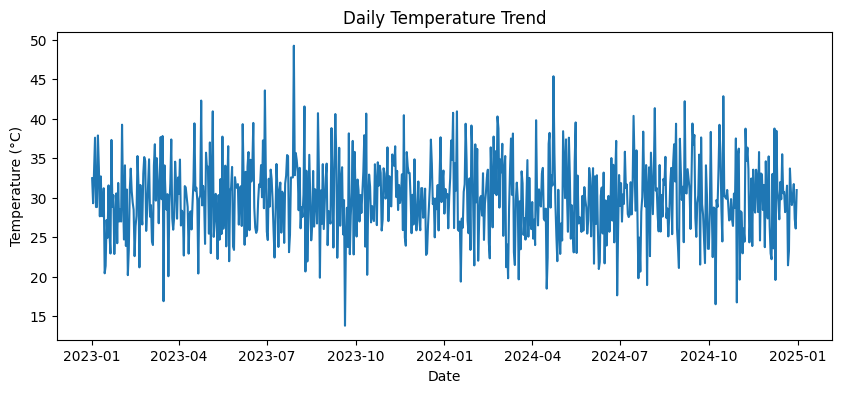

In [4]:
plt.figure(figsize=(10,4))
plt.plot(df["Date"], df["Temperature"])
plt.title("Daily Temperature Trend")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()


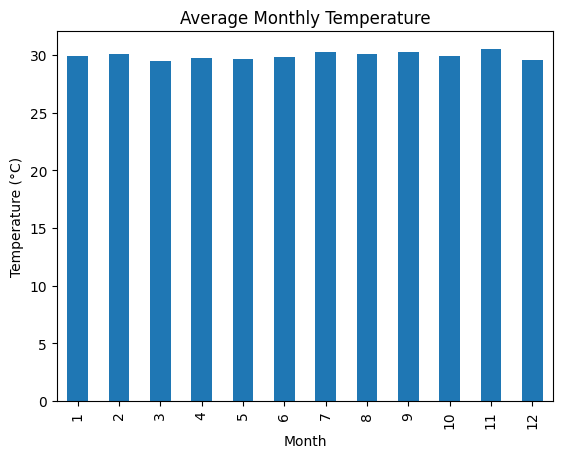

In [5]:
monthly_temp = df.groupby("Month")["Temperature"].mean()

monthly_temp.plot(kind="bar", title="Average Monthly Temperature")
plt.ylabel("Temperature (°C)")
plt.show()


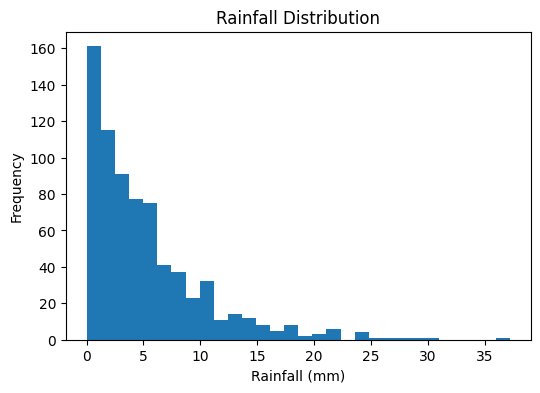

In [6]:
plt.figure(figsize=(6,4))
plt.hist(df["Rainfall"], bins=30)
plt.title("Rainfall Distribution")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.show()


In [7]:
extreme_days = df[df["Temperature"] > 40]
len(extreme_days)


17

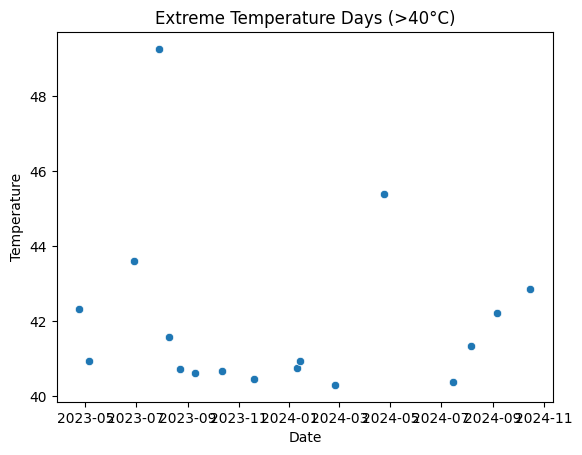

In [8]:
sns.scatterplot(x="Date", y="Temperature", data=extreme_days)
plt.title("Extreme Temperature Days (>40°C)")
plt.show()


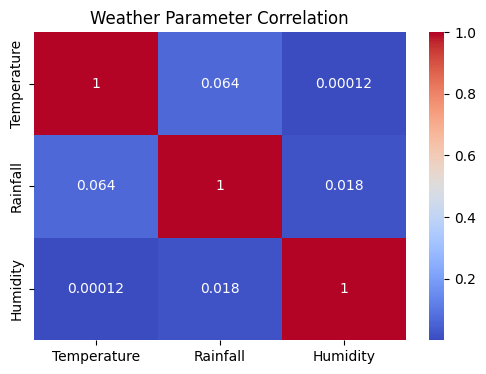

In [9]:
plt.figure(figsize=(6,4))
sns.heatmap(
    df[["Temperature", "Rainfall", "Humidity"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Weather Parameter Correlation")
plt.show()


In [10]:
os.makedirs("../../visualizations/project3_weather_analysis", exist_ok=True)
print("Weather visualization directory ready")


Weather visualization directory ready


## 📌 Key Insights

1. Temperature shows clear seasonal variation across months.
2. Extreme temperature events are limited but increasing during summer months.
3. Rainfall distribution is highly skewed, indicating irregular rainfall patterns.
4. Humidity shows moderate correlation with rainfall.

## 🎯 Recommendations

- Implement early warning systems for extreme heat days.
- Plan water resource management based on rainfall variability.
- Use long-term trend analysis for climate adaptation strategies.
